> 

# Project: Investigate a Dataset: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

I've selected the TMDb movies dataset.This dataset has more than 10k rows and 21 columns including director,revenue,budget of a movies.

## Questions can be asked about this dataset:

1.The most profitable mvie and the average profit of the movies? 

2.The movie that has largest budget and the average budget for all the movies?  

3.The movies that has the largest revenue and the averge revenue for all movies?  

4.Which movie has the highest rating?  

5.which movie has the longest and shortest runtime?

6.What is the average runtime?  

7.How does rating distribute? 

7.Does higher rating means higher chance of being more profitable?  

8.What variables are correlated with profits?  

9.What are the most frequent genres,production companies,directors and actors for the profitable movies?  

10.In which month the average profits are the most?  

11.In which month there are the largest number of movies released?  

12.What factors would I take into consideration when making a decision on investing a movie?

In [21]:
# set up import statements for all of the packages that I plan on using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Data Wrangling

## Drop unrelevant columns

In [2]:
# load the data and check the head of the dataframe
df = pd.read_csv('tmdb.movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


There are several columns such as homepage or tagline that we can hardly do any analysis.So I think droppping them would be a good idea. 

In [4]:
# check the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#drop the unnecessary columns
df.drop(['homepage','tagline','overview','keywords','imdb_id','revenue_adj','budget_adj'],axis = 1,inplace = True)

In [29]:
# check the head again
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


## Drop null values

In [6]:
# drop rows that have null values
df.dropna(inplace = True)

In [7]:
# check if the data type is correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


## Fix data type

In [8]:
#convert release_day from string to datetime
from datetime import datetime 
df['release_date'] = df['release_date'].apply(lambda x:datetime.strptime(x,'%m/%d/%y'))

In [9]:
# check the data type again to make sure the conversion works
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

## Drop duplicates

In [10]:
# check the duplicates
df.duplicated().sum()

1

In [11]:
# drop the duplicates
df.drop_duplicates(inplace = True)

In [12]:
#check again to make sure we dropped the duplicates
df.duplicated().sum()

0

## Remove the 0's from budget, revenue and runtime columns

In [13]:
# There are 0's in budge,revenue and runtime columns,it doesnt make any sense and we need to drop them.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


In [14]:
#replace 0 values with null values
df['budget'].replace(0,np.nan,inplace = True)

In [15]:
# replace the 0 with nan for the column revenue
df['revenue'].replace(0,np.nan,inplace = True)

In [16]:
# replace the 0 with nan for the column runtime
df['runtime'].replace(0,np.nan,inplace = True)

In [17]:
#drop all the null values
df.dropna(inplace = True)

In [18]:
#check if 0 values still exist,since the min value is larger than 0,we got rid of all the 0s
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


## Rename columns

In [43]:
# rename budget,revenue and runtime columns
df.rename(columns = {'budget':'budget_in_dollars','revenue':'revenue_in_dollars','runtime':'runtime_in_mins'},inplace = True)

In [44]:
# chech the head to make sure I changed the columns'name 
df.head(1)

,id,popularity,budget_in_dollars,revenue_in_dollars,original_title,cast,director,runtime_in_mins,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [45]:
#print the shape of the dataframe
print('There are ' + str(df.shape[0])+ ' entries and '+ str(df.shape[1]) + ' columns in this dataset.')

There are 3805 entries and 14 columns in this dataset.


# Exploratory Data Analysis

###  Research Question 1: General questions about the dataset

1.The most profitable movies and the average profit of the movies  

2.The largest budget and the average budget?  

3.The largest revenue and the averge revenue.

4.Which movie has the highest rating?  

5.which movie has the longest and shortest runtime?  

6.What is the average runtime?

7.Visualization about the runtime and vote_average.  

In [54]:
# Creat a profit column and sort the rows by it
df['profit'] = df['revenue_in_dollars']-df['budget_in_dollars']
df.sort_values('profit', ascending = False,inplace = True)

In [55]:
#which movie is the most profitable movies,I have already sorted the values ,the first one is the largest
print(pd.DataFrame(df.iloc[0,:]).loc['original_title'] +' is the most profitable movie')

1386    Avatar is the most profitable movie
Name: original_title, dtype: object


In [56]:
# The average profit
print('The average profit is '+ str(df['profit'].mean()) + ' dollars')

The average profit is 71365395.43206307 dollars


In [57]:
#which movie has the largest budget
print(df[df['budget_in_dollars']==df['budget_in_dollars'].max()]['original_title'] + ' has the largest budget')

2244    The Warrior's Way has the largest budget
Name: original_title, dtype: object


In [58]:
# What is the average budget of the movies
print('The average budget is '+ str(df['budget_in_dollars'].mean()) +' dollars')

The average budget is 37607996.559526935 dollars


In [59]:
#which movie has the largest revenue
print(df[df['revenue_in_dollars']==df['revenue_in_dollars'].max()]['original_title'] + ' has the largest revenue')

1386    Avatar has the largest revenue
Name: original_title, dtype: object


In [60]:
#What is the average revenue of the movies
print('The average revenue is ' + str(df['revenue_in_dollars'].mean()) +' dollars')

The average revenue is 108973391.99159001 dollars


In [53]:
# which movie has the highest average rating
df[df['vote_average'] == df['vote_average'].max()]

,id,popularity,budget_in_dollars,revenue_in_dollars,original_title,cast,director,runtime_in_mins,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
7948,24128,0.283191,1200000.0,4978922.0,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88.0,Documentary|Music,Talking Heads|Arnold Stiefel Company,1984-11-16,23,8.4,1984,3778922.0
4178,278,7.192039,25000000.0,28341469.0,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,3341469.0


There are two movies having the same highest rating.However, Stop Making Sense has only 23 vote counts.It is possible that this movie has received high rating because of too few vote counts.I would say The Shawshank Redemption has the highest rating if I have to pick one of them.

In [61]:
# which movie has the longest runtime
print(df[df['runtime_in_mins'] == df['runtime_in_mins'].max()]['original_title']+' has the longest runtime' )

2107    Carlos has the longest runtime
Name: original_title, dtype: object


In [62]:
# which movie has the shortest runtime
print(df[df['runtime_in_mins'] == df['runtime_in_mins'].min()]['original_title'] +' has the shortest runtime') 

5162    Kid's Story has the shortest runtime
Name: original_title, dtype: object


In [63]:
# avarge runtime for the movies in the dataset
avg_runtime = df['runtime_in_mins'].mean()
print('The average runtime is '+ str(avg_runtime) + ' mins')

The average runtime is 109.35111695137977 mins


Text(0, 0.5, 'Movie count')

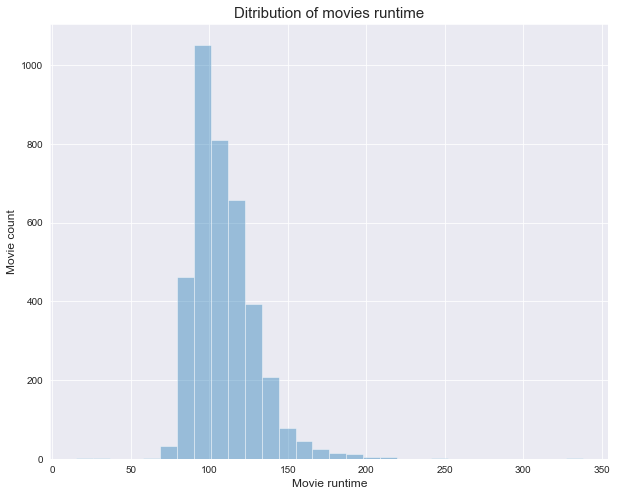

In [64]:
# visualize the runtime distribution
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
sns.distplot(df['runtime_in_mins'],kde = False,bins = 30)
plt.title('Ditribution of movies runtime',fontsize = 15)
plt.xlabel('Movie runtime',fontsize = 12)
plt.ylabel('Movie count',fontsize = 12)

 Almost all the runtime for movies is between 50 and 200.This ditribution is right skewed.More than 1000 movies have the runtime between 90 and 100 mins,which ranks first.More than 800 movies are between 100 and 110 mins.

Text(0, 0.5, 'movie in the dataset')

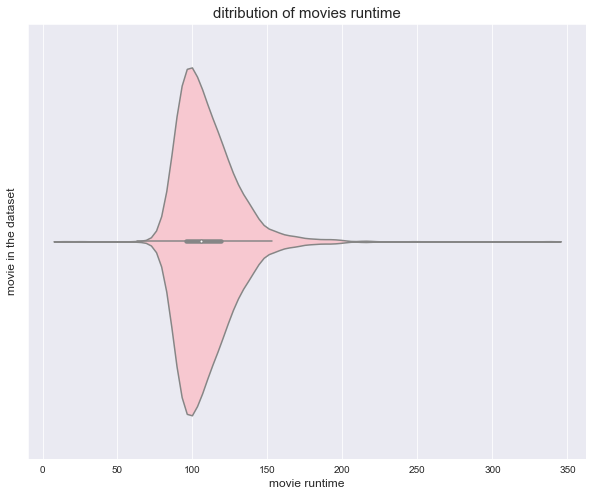

In [65]:
plt.figure(figsize = (10,8))
sns.violinplot(df['runtime_in_mins'],color = 'pink')
plt.title('ditribution of movies runtime',fontsize = 15)
plt.xlabel('movie runtime',fontsize = 12)
plt.ylabel('movie in the dataset',fontsize = 12)

There are some outliers whose runtime is longer than 300 mins.

Text(0, 0.5, 'Movie count')

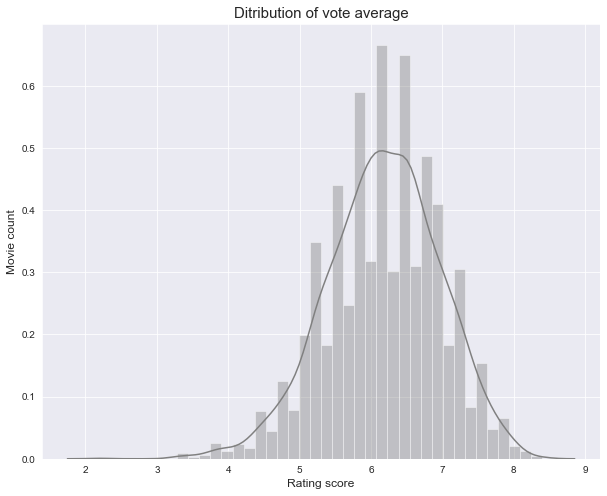

In [66]:
# visualize the vote_average distribution
plt.figure(figsize = (10,8))
sns.distplot(df['vote_average'],bins =40,color = 'grey')
plt.title('Ditribution of vote average',fontsize = 15)
plt.xlabel('Rating score',fontsize = 12)
plt.ylabel('Movie count',fontsize = 12)

 The vote average is almostly normally distributed and a little left skewed. The averge and the median are between 5 and 7.

## Research Question 2: What properties do profitable movies have?

1.Whether higher rated movies are more profitable?  
2.Visualize the the sum of profit group by year.  
3.In which year movies have the most profits?  
4.Visulize the correlation between different variables.  
5.Explore the relation between popularity and profit.  
6.Explore the relation between vote_count and profit.  
7.Explore the most frequent directors and actors in the profitable movies.  
8.Explore the most frequent genres in the profitable movies.  
9.Explore which month has the highest average profit and largest number of movies released? 

Text(0, 0.5, 'Average profit')

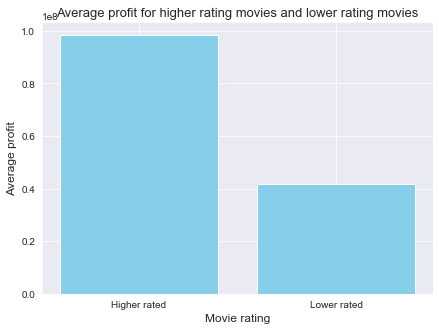

In [67]:
# To check if the higher rated movies are more profitable
df_higher_rating = df[df['vote_average'] >= df['vote_average'].mean()]
df_lower_rating = df[df['vote_average'] < df['vote_average'].mean()]
avg_profit_for_higher = df_higher_rating['profit'].mean()
avg_profit_for_lower = df_lower_rating['profit'].mean()

# plot a bar chart for both the lower rated and higher rated movies
plt.figure(figsize = (7,5))
plt.bar(['Higher rated','Lower rated'],[avg_profit_for_higher,avg_profit_for_lower],color = 'skyblue')
plt.title('Average profit for higher rating movies and lower rating movies',fontsize = 13)
plt.xlabel('Movie rating',fontsize = 12)
plt.ylabel('Average profit',fontsize = 12)

From the chart above,it seems that higher rated movies are much profitable than the lower rating movies.The profit for higher rated movies is almost twice of that of the lower rated movies.

In [68]:
#calculate the sum of profits of all the movies group by year
profit_by_year = df.groupby('release_year')['profit'].sum()

Text(0.5, 1.0, 'profit of all the movies group by year')

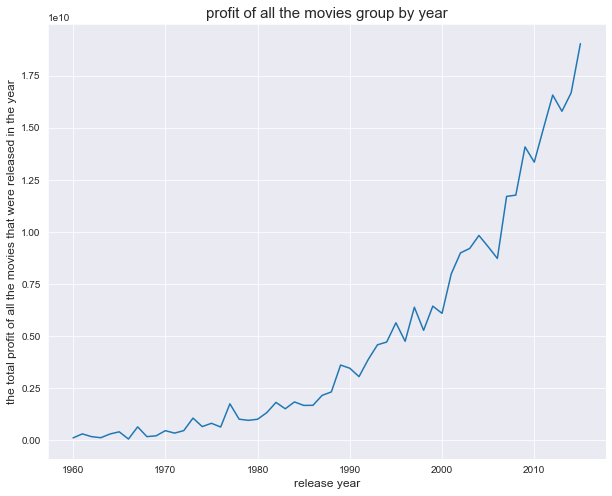

In [69]:
# visualize the profit by year
plt.figure(figsize = (10,8))
profit_by_year.plot()
plt.xlabel('release year',fontsize = 12)
plt.ylabel('the total profit of all the movies that were released in the year',fontsize = 12)
plt.title('profit of all the movies group by year',fontsize = 15)

from the plot below, the profit of movies is increasing significantly with fluctation from 1960 to 2016.

In [70]:
# in which year movies has the most profits
print(str(profit_by_year.idxmax())+ ' is the year that has the most profits')

2015 is the year that has the most profits


Text(0.5, 1.0, 'Profit distribution')

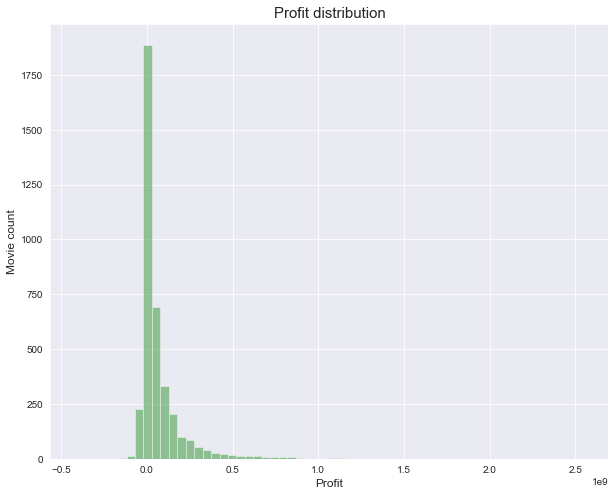

In [1668]:
plt.figure(figsize = (10,8))
sns.distplot(df['profit'],color = 'green',kde = False,bins = 60)
plt.xlabel('Profit',fontsize = 12)
plt.ylabel('Movie count',fontsize = 12)
plt.title('Profit distribution',fontsize = 15)

There are negative profits for some movies.The profits of most of the movies are distributed between 0 and 3,00,000,000 dollars.very few movies have more than 5,00,000,000 dollars profits.

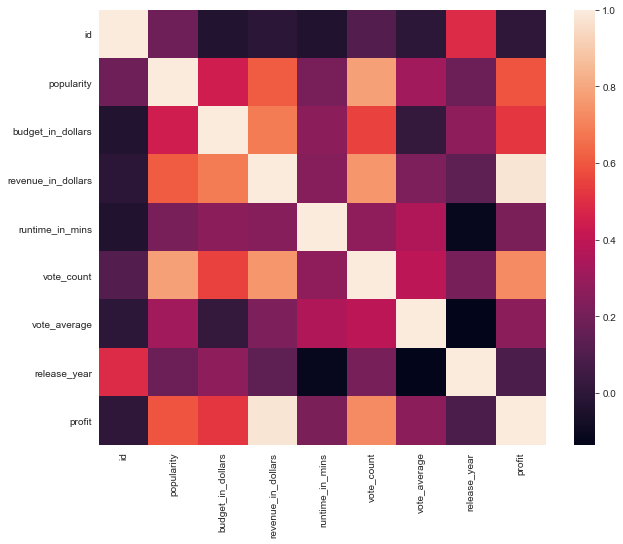

In [71]:
# creat a correlation matrix 
df.corr()
# plot the heatmap,which is one of the most effective ways to visualize correlations
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())

we can see from the heapmap that profit is positively correlated with popularity and vote_count

Text(0.5, 1.0, 'The relation between popularity and profit')

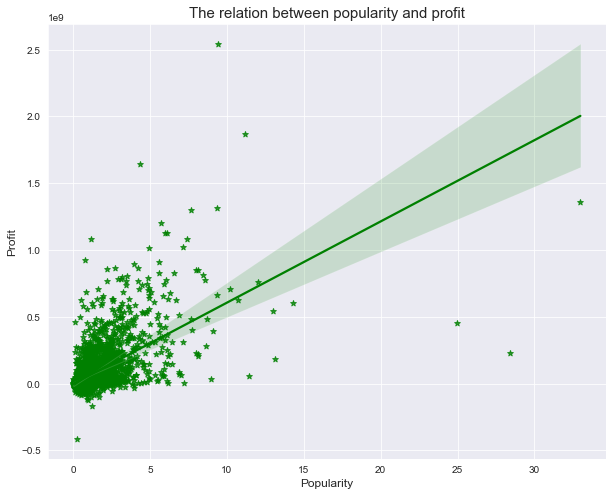

In [72]:
#let's visualize the relation between popularity and profit
plt.figure(figsize = (10,8))
sns.regplot(x= df['popularity'],y=df['profit'],data = df,color = 'green',marker = "*")
plt.xlabel('Popularity',fontsize = 12)
plt.ylabel('Profit',fontsize = 12)
plt.title('The relation between popularity and profit',fontsize = 15)

There is a positive correlation between popularity and profit.

Text(0.5, 1.0, 'The relation between vote count and profit')

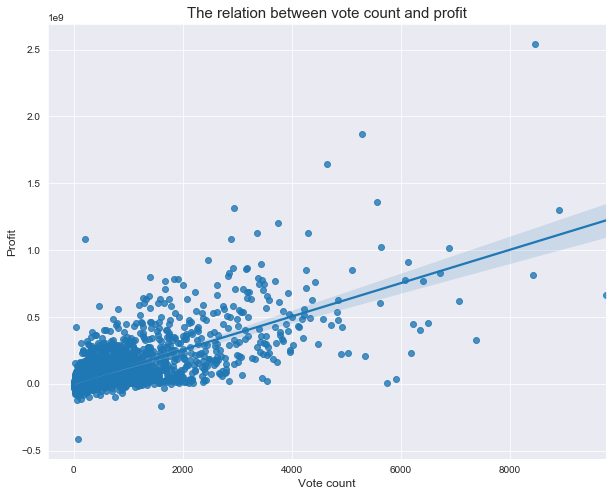

In [73]:
# explore the relation between profit and vote_count
plt.figure(figsize = (10,8))
sns.regplot(x = df['vote_count'],y = df['profit'],data = df)
plt.xlabel('Vote count',fontsize = 12)
plt.ylabel('Profit',fontsize = 12)
plt.title('The relation between vote count and profit',fontsize = 15)

There is a positive correlation between vote count and profit.

In [74]:
#let's explore those movies whose profits are above the average 
# and creat a new dataframe for the profitable movies called pro_movies
pro_movies = df[df['profit']>=df['profit'].mean()]

In [75]:
# define a function to do the value counts for columns that contain '|'
def value_counts_function(columns):
    return pd.Series(pro_movies[columns].str.cat(sep = '|').split('|')).value_counts(ascending = False)

In [76]:
# Most frequent directors in the profitable movies
value_counts_function('director').head(10)

Steven Spielberg      22
Robert Zemeckis       12
Ridley Scott          10
Tim Burton             9
Ron Howard             8
Michael Bay            8
M. Night Shyamalan     8
Steven Soderbergh      7
Roland Emmerich        7
Clint Eastwood         7
dtype: int64

The most frequent director is Steven Spielberg,who has 22 counts in the profitable movies dataset,followed by Robert Zemeckis and Ridley scott.

In [77]:
# Most frequent actors or actresses in the profitable movies
value_counts_function('cast').head(10)

Tom Cruise            26
Tom Hanks             20
Sylvester Stallone    20
Brad Pitt             20
Cameron Diaz          18
Adam Sandler          18
Bruce Willis          17
Jim Carrey            16
Will Smith            16
Ben Stiller           16
dtype: int64

The most frequent actor/actress is Tom Cruise, who has 26 counts in the profitable movies dataset.

In [78]:
# Most frequent production campanies in the profitable movies
value_counts_function('production_companies').head(10)

Universal Pictures                        131
Warner Bros.                              119
Paramount Pictures                        107
Twentieth Century Fox Film Corporation    102
Columbia Pictures                          73
Walt Disney Pictures                       66
New Line Cinema                            55
Relativity Media                           38
Columbia Pictures Corporation              38
DreamWorks SKG                             37
dtype: int64

The most frequent production companies in the profitable dataset is Universal pictures,having 131 counts,followed by warner Bros.

In [79]:
# let's creat a dataframe for the movies genres counts
genres_value_counts = pd.DataFrame(value_counts_function('genres'),columns = ['counts'])
genres_value_counts

,counts
Comedy,384
Action,382
Drama,365
Adventure,321
Thriller,308
Family,189
Romance,179
Science Fiction,176
Fantasy,166
Crime,145


Text(0, 0.5, 'movies genres')

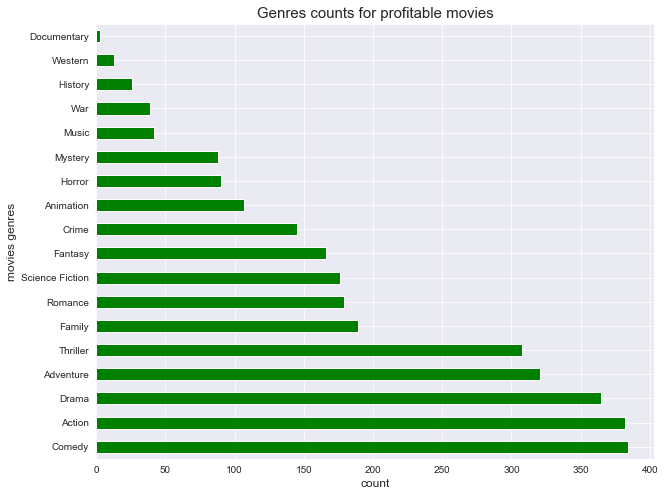

In [1662]:
# visualize the genres columns
genres_value_counts.plot(kind = 'barh',color = 'green',figsize = (10,8),legend = False, use_index = True)
plt.title('Genres counts for profitable movies',fontsize = 15)
plt.xlabel('count',fontsize = 12)
plt.ylabel('movies genres',fontsize = 12)

Comedy is the most popular movies genre in the profitable movies.Drama,action and comedy are the three genres that have more than 350 counts in this profitable movies dataset,fllowed by the thriller and adventure.Docmentary is the least popular movies genre in the profitable movies dataset.

In [80]:
#set the index to release_date
pro_movies.set_index('release_date',inplace = True)

In [82]:
# creat a new column for the extracted data month
pro_movies['month']=pd.DatetimeIndex(pro_movies.index).month

/Users/leizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
# calculate the average of profits group by month
profit_by_month = pro_movies.groupby('month')['profit'].mean()

In [84]:
# creat a month list as the ticks for x-axis
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

Text(0, 0.5, 'Average profit')

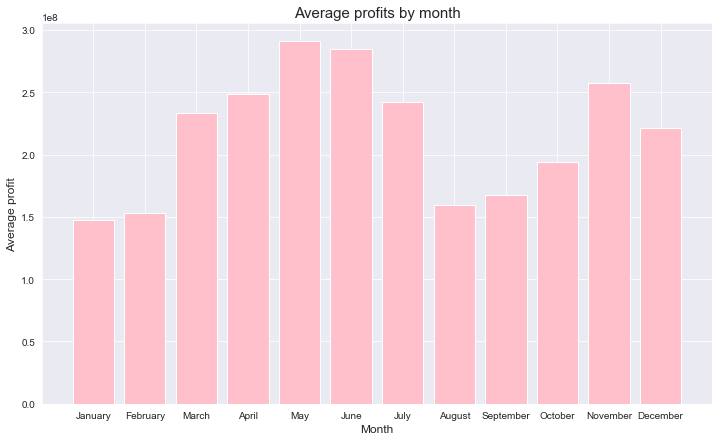

In [85]:
# plot the average profit chart group by month
plt.figure(figsize = (12,7))
plt.bar(month_list,profit_by_month,color = 'pink')
plt.title('Average profits by month',fontsize = 15)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Average profit',fontsize = 12)

May is the month that has the highest average movies profit,followed by June and November.January is the month that has the least average profits during a year for the profitable movies dataset.

In [86]:
# calculate the movie count group by month
count_by_month = pro_movies.groupby('month')['profit'].count()

Text(0, 0.5, 'Movies counts')

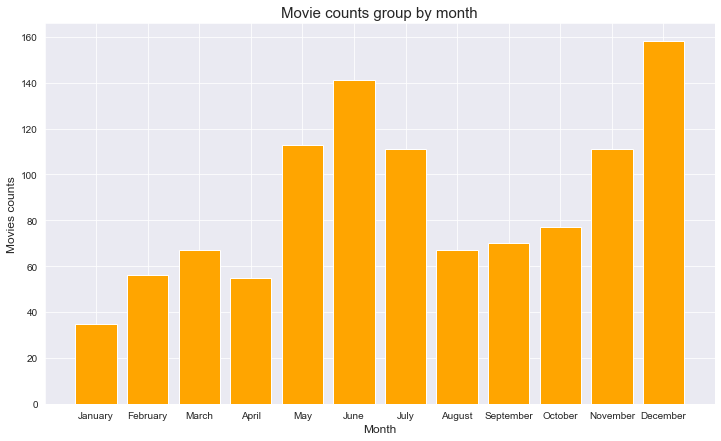

In [87]:
# plot the movie count chart group by month
plt.figure(figsize = (12,7))
plt.bar(month_list,count_by_month,color = 'orange')
plt.title('Movie counts group by month',fontsize = 15)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Movies counts',fontsize = 12)

December has the largest number of movies released for the profitable movies dataset,followed by June.January has the least number of movies released.

# Conclusion

1.Profit is positively correlated with popularity and vote count.   
2.The average profits of the half higher rated movies are much more than those of the half lower rated movies.   
3.The profits of most of the movies are distributed between 0 and 3,00,000,000 dollars.very few movies have more than 5,00,000,000 dollars profits.   
4.Comedy,action, drama, adventure and thriller are the five most populart genres in the profitable movies dataset.  
5.Tom Cruise,Brad Pitt,Tom Hanks,Sylvester Stallone  and Adam Sandler are the five most popular actors in the profitable movies dataset  
6.Steven Spielberg,Robert Zemeckis,Ridley Scott,Tim Burton and Michael Bay are the five most popular directors in the profitable movies dataset  
7.Universal Pictures,Warner Bros,Paramount Pictures,Twentieth Century Fox Film Corporation and Columbia Pictures are the most frequent production companies in the profitable movies dataset.  
8.May and June are have the most average profits for the movies released,January has tge lease average profits.  
9.Largest number of movies in the profitable dataset are released in December.  

If I have the opportunity to invest a movie, I would choose a comedy/action/drama movie directed by the five most popular directors,casted by the most popular actors and produced by the most frequent production companies,released in May or June.I'm not saying that movies meeting all the requirements are definitely going to be profitable and sucessful.However, movies meeting the criteria have higher probability to be profitable

## Limitations

This analysis is based on the dataset with 3800 entries, which is a relatively small dataset and might not be error free in the real world when taking complicated situations into consideration.I've defined a movie to be a profitable movies by comparing the profits of the movie made with the average value.This seems reasonable in this dataset but might not be a accurate way in real world. Different production companies have different ways of defining whether a movie is worth producing or investing.It depends on so many factors such as the financial situation of the company, the preference of the audiences that the companies try to attract.In addition,dropping rows with missing values might also have an impact on the analysis.Furthermore,there are no currency unit in the revenue and budget columns,it is possible that there are more than one currency unit in those columns due to different countries that those companies are located.